In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(10)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | pochutla
Processing Record 3 of Set 1 | george town
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | yomitan
City not found. Skipping...
Processing Record 11 of Set 1 | staryy nadym
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | baykit
Processing Record 14 of Set 1 | port keats
Processing Record 15 of Set 1 | lewiston
Processing Record 16 of Set 1 | alyangula
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | salamanca
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | punta arenas
Processing

Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | kaeo
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | bereda
Processing Record 45 of Set 4 | praia
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | helena
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | luwuk
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | santa isabel do rio negro
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | qasigiannguit
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | naukot
Processing Record 10 of Set 5 | changde
Processing Record 11 of Set 5 | karakose
City not found. Skipping...
Processing Record 12 of Set 5 | shuangcheng


Processing Record 25 of Set 8 | carlsbad
Processing Record 26 of Set 8 | cayenne
Processing Record 27 of Set 8 | pisco
Processing Record 28 of Set 8 | isiro
Processing Record 29 of Set 8 | richards bay
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | nuevo laredo
Processing Record 32 of Set 8 | sonthofen
Processing Record 33 of Set 8 | goderich
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | puerto del rosario
Processing Record 37 of Set 8 | dudinka
Processing Record 38 of Set 8 | chemainus
Processing Record 39 of Set 8 | ararat
Processing Record 40 of Set 8 | kulykiv
Processing Record 41 of Set 8 | aurillac
Processing Record 42 of Set 8 | isla mujeres
Processing Record 43 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | portage
Processing Record 46 of Set 8 | beyneu
Processing Record 47 of Set 8 | kayerkan
Processing Record 4

Processing Record 7 of Set 12 | mogapi
Processing Record 8 of Set 12 | marawi
Processing Record 9 of Set 12 | angelholm
City not found. Skipping...
Processing Record 10 of Set 12 | evinayong
Processing Record 11 of Set 12 | sao filipe
Processing Record 12 of Set 12 | hirado
Processing Record 13 of Set 12 | latina
Processing Record 14 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 12 | turayf
Processing Record 16 of Set 12 | birjand
Processing Record 17 of Set 12 | sault sainte marie
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | petropavlovka
Processing Record 20 of Set 12 | port shepstone
Processing Record 21 of Set 12 | shenjiamen
Processing Record 22 of Set 12 | borovoy
Processing Record 23 of Set 12 | bud
Processing Record 24 of Set 12 | amberley
Processing Record 25 of Set 12 | la ronge
Processing Record 26 of Set 12 | roebourne
Processing Record 27 of Set 12 | aybak
City not found. Skipping...
Processing Record 28 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,68.11,70,0,5.01,ZA,2022-01-29 22:00:04
1,Pochutla,15.7432,-96.4661,85.82,48,2,8.12,MX,2022-01-29 22:00:08
2,George Town,5.4112,100.3354,81.90,83,20,0.00,MY,2022-01-29 22:00:09
3,Vila Velha,-20.3297,-40.2925,79.95,87,93,11.01,BR,2022-01-29 22:00:10
4,Busselton,-33.6500,115.3333,67.05,91,7,13.53,AU,2022-01-29 21:52:53
5,Mount Gambier,-37.8333,140.7667,62.51,94,100,8.05,AU,2022-01-29 21:56:55
6,Vaini,-21.2000,-175.2000,81.48,78,100,15.75,TO,2022-01-29 21:55:19
7,Rikitea,-23.1203,-134.9692,77.23,72,100,10.40,PF,2022-01-29 21:51:37
8,Mahebourg,-20.4081,57.7000,79.09,83,20,5.75,MU,2022-01-29 21:55:18
9,Staryy Nadym,65.6118,72.6842,-8.12,95,98,9.08,RU,2022-01-29 22:00:12


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-01-29 22:00:04,-33.9258,18.4232,68.11,70,0,5.01
1,Pochutla,MX,2022-01-29 22:00:08,15.7432,-96.4661,85.82,48,2,8.12
2,George Town,MY,2022-01-29 22:00:09,5.4112,100.3354,81.90,83,20,0.00
3,Vila Velha,BR,2022-01-29 22:00:10,-20.3297,-40.2925,79.95,87,93,11.01
4,Busselton,AU,2022-01-29 21:52:53,-33.6500,115.3333,67.05,91,7,13.53
5,Mount Gambier,AU,2022-01-29 21:56:55,-37.8333,140.7667,62.51,94,100,8.05
6,Vaini,TO,2022-01-29 21:55:19,-21.2000,-175.2000,81.48,78,100,15.75
7,Rikitea,PF,2022-01-29 21:51:37,-23.1203,-134.9692,77.23,72,100,10.40
8,Mahebourg,MU,2022-01-29 21:55:18,-20.4081,57.7000,79.09,83,20,5.75
9,Staryy Nadym,RU,2022-01-29 22:00:12,65.6118,72.6842,-8.12,95,98,9.08


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

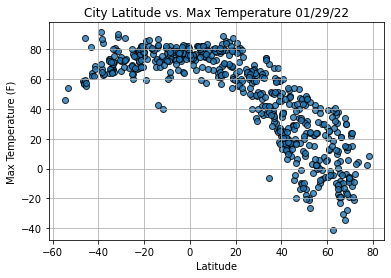

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


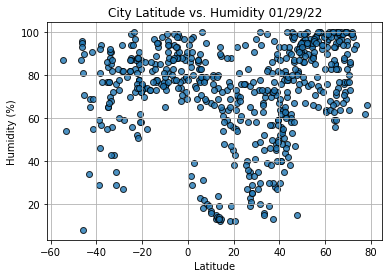

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

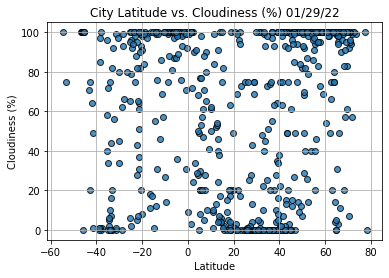

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

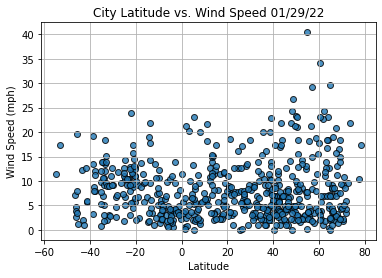

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Lewiston
Country                        US
Date          2022-01-29 22:00:16
Lat                       44.1003
Lng                      -70.2148
Max Temp                    15.75
Humidity                       91
Cloudiness                    100
Wind Speed                  18.41
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
576     True
577    False
578     True
579     True
580    False
Name: Lat, Length: 581, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pochutla,MX,2022-01-29 22:00:08,15.7432,-96.4661,85.82,48,2,8.12
2,George Town,MY,2022-01-29 22:00:09,5.4112,100.3354,81.90,83,20,0.00
9,Staryy Nadym,RU,2022-01-29 22:00:12,65.6118,72.6842,-8.12,95,98,9.08
10,Kapaa,US,2022-01-29 21:48:04,22.0752,-159.3190,80.58,70,20,3.00
11,Baykit,RU,2022-01-29 22:00:14,61.6700,96.3700,-4.54,100,98,1.10


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

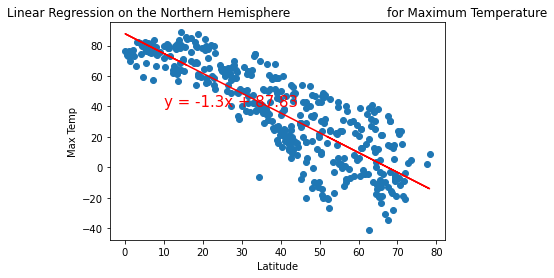

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

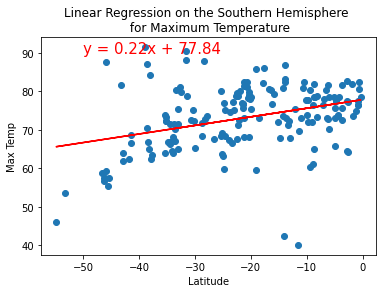

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

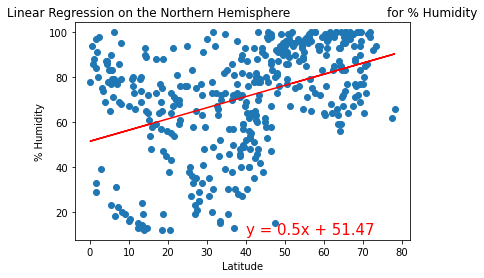

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

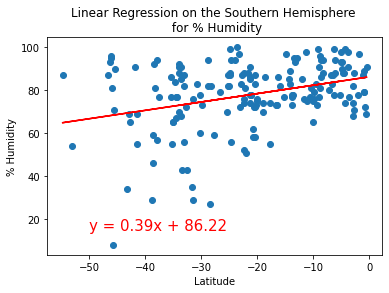

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


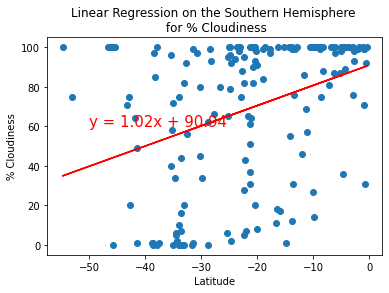

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

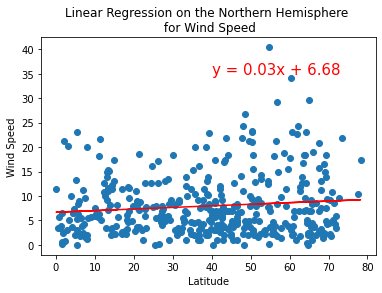

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

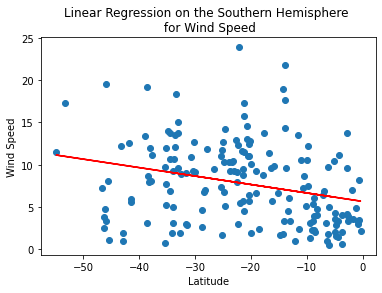

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))